In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("C:\\Users\\khush\\Downloads\\tower_of_god_user_data_large.csv")


In [23]:
#Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Date                            0
Page_Views                      0
Average_Time_Spent_(Minutes)    0
Bounce_Rate (%)                 0
dtype: int64


In [24]:
#Check Data Types
print("\nData Types:\n", df.dtypes)




Data Types:
 Date                             object
Page_Views                        int64
Average_Time_Spent_(Minutes)    float64
Bounce_Rate (%)                   int64
dtype: object


In [6]:
#Remove Duplicates
df.drop_duplicates(inplace=True)


In [8]:
#Inspect Data
print("\nData Sample:\n", df.head())


Data Sample:
          date  page_views  average_time_spent_(minutes)  bounce_rate_(%)
0  2023-10-01        1191                          2.98               59
1  2023-10-02        1059                          2.73               48
2  2023-10-03        1762                          4.22               55
3  2023-10-04        1009                          2.53               52
4  2023-10-05        1978                          2.19               53


In [9]:
# Convert the 'date' column to datetime format for better handling
df['date'] = pd.to_datetime(df['date'])

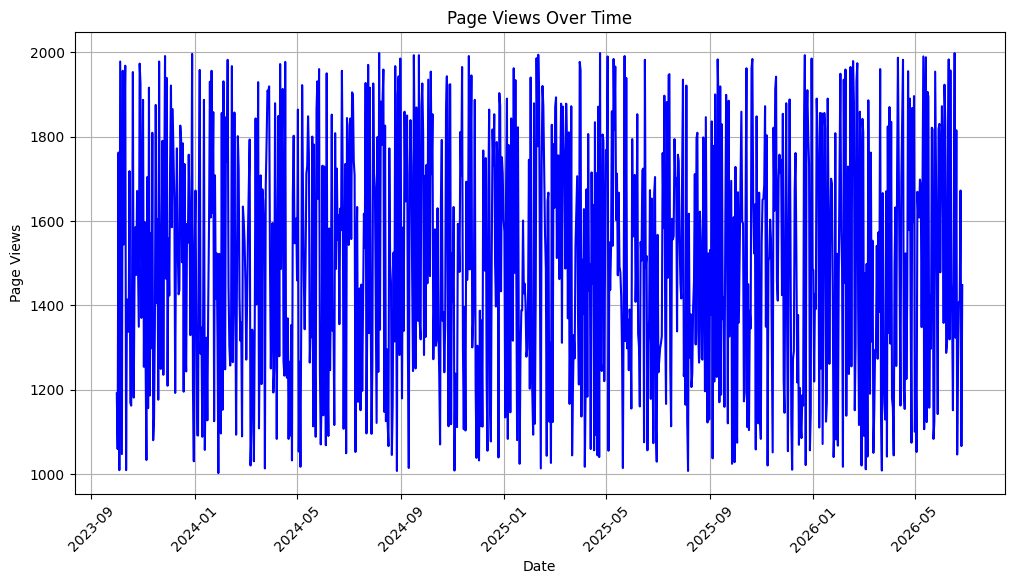

In [10]:
# Visualize Page Views Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['page_views'], color='blue')
plt.title('Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
# Categorize Average Time Spent into bins for pie chart visualization
time_spent_bins = [0, 2, 3, 4, 5, 6]
labels = ['< 2 mins', '2-3 mins', '3-4 mins', '4-5 mins', '> 5 mins']
df['time_spent_category'] = pd.cut(df['average_time_spent_(minutes)'], bins=time_spent_bins, labels=labels, include_lowest=True)

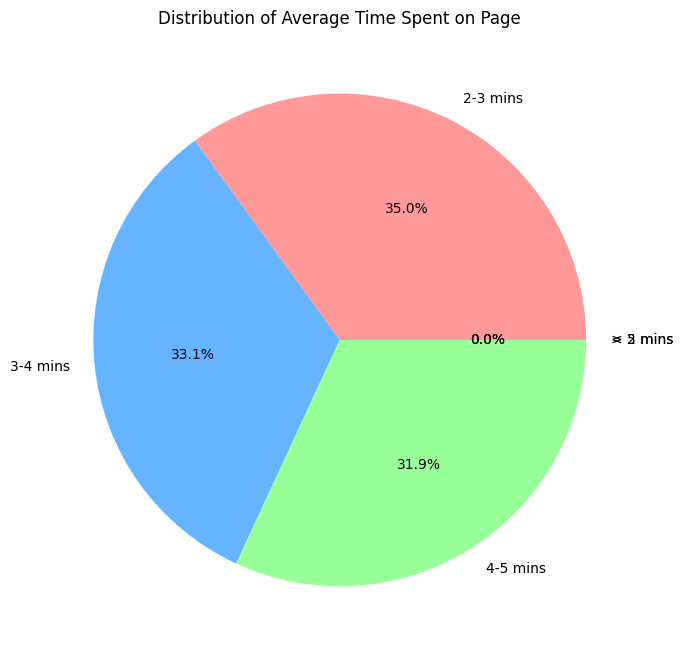

In [12]:
# Pie Chart of Average Time Spent
time_spent_distribution = df['time_spent_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(time_spent_distribution, labels=time_spent_distribution.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])
plt.title('Distribution of Average Time Spent on Page')
plt.show()

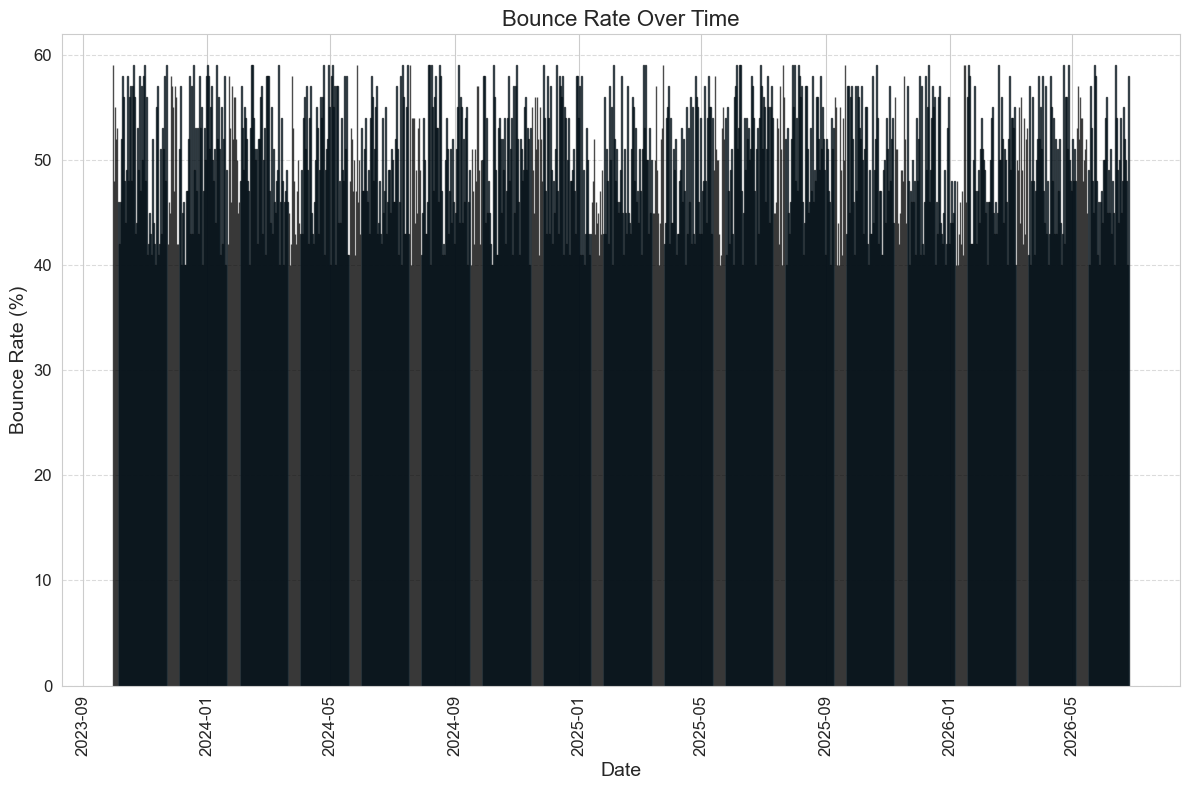

In [25]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Create a bar plot of bounce rate over time
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
plt.bar(df['Date'], df['Bounce_Rate (%)'], color='#3498db', edgecolor='black', alpha=0.7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Bounce Rate (%)', fontsize=14)
plt.title('Bounce Rate Over Time', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


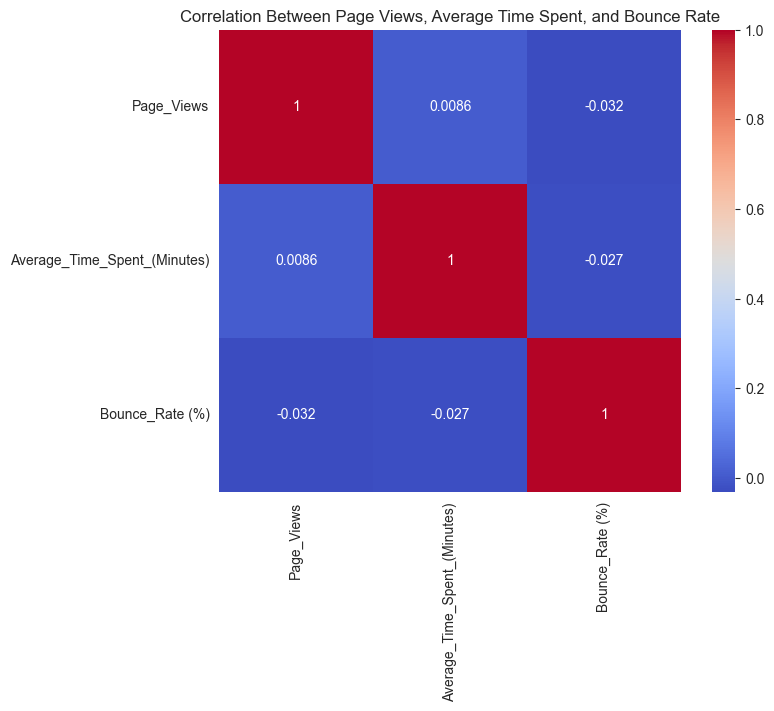

In [26]:
# Create a heatmap to identify correlation between page views, average time spent, and bounce rate
corr_matrix = df[['Page_Views', 'Average_Time_Spent_(Minutes)', 'Bounce_Rate (%)']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Page Views, Average Time Spent, and Bounce Rate')
plt.show()